## AUTO REGRESSIVE Models

Auto-regressive (AR) and moving average (MA) models are popular models that are frequently used for forecasting.

AR and MA models are combined to create models such as auto-regressive moving average (ARMA) and auto-regressive integrated moving average (ARIMA) models. 

The initial ARMA and ARIMA models were developed by Box and Jenkins in 1970.

ARMA models are basically regression models; auto-regression means regression of a variable on itself measured at different time periods. 

The main assumption of AR model is that the time series data is stationary.

A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.

http://people.duke.edu/~rnau/411diff.htm

When the time series data is not stationary, then we convert the non-stationary data before applying AR models. 

### Lags

Taking the difference between consecutive observations is called a lag-1 difference.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.

**White noise of the residuals:**

White noise is a process of residuals $\epsilon_t$ that are uncorrelated and follow normal distribution with mean 0 and constant standard deviation. In AR models, one of the main assumptions is the errors follow a white noise.

### Auto-Regressive  (AR) Models

Auto-Regression is a regression of a variable on itself measured at different time points. 
Auto-Regressive model with lag 1, AR(1) is given by 
* $Y_{t+1} = \beta Y_t + \epsilon_{t+1}$  and this same as
* $Y_{t+1} - \mu = \beta (Y_t - \mu) + \epsilon_{t+1}$  and this same as
* where $\epsilon_{t+1}$ is a sequence of uncorrelated residuals that follow normal distribution with zero mean and constant deviation. 
 * $Y_{t+1} - \mu$ is interpreted as a deviation from mean value $mu$ and known as mean centered series.



The Augmented Dickey Fuller Test (ADF) is unit root test for stationarity. 
The null hypothesis is that time series is non-stationary.
Alternative hypothesis is that time series is stationary.

### AR Model indentification


### Auto-Correlation Function (ACF) or correlogram and Partial Auto-Correlation Function (PACF)

#### Autocorrelation Function (ACF)

**A plot of auto-correlation of different lags is called ACF.**

The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coeﬃcient between -1 and 1 for negative and positive correlation.

#### Partial Autocorrelation Function (PACF)

**A plot of partial auto-correlation for different values of lags is called PACF.**

The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% conﬁdence intervals as horizontal lines. Bars that cross these conﬁdence intervals are therefore more signiﬁcant and worth noting. Some useful patterns you may observe on these plots are:

The number of lags is p when:
* The partial auto-correlation, |$\rho_{pk}$| > 1.96 / $\sqrt{n}$ for first p values and cuts off to zero. 
* The auto-correlation function, $\rho_k$ decreases exponentially.

*  The model is AR of order p when the PACF cuts-off after a lag p.

*  The model is MA of order p when the ACF cuts-off after a lag q.

*  The model is a mix of AR and MA if both the PACF and ACF trail oﬀ and cuts-off at p and q respectively.

* For an **ARIMA (p,d,q)** process, it becomes non-stationary to stationary after differencing it for **d** times.

#### Import the necessary libraries.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Read the data set in a Time Series with proper Time frequency or period.

In [2]:
df = pd.read_csv('C:/Users/varun/Downloads/MaunaLoa.csv')

df.head()
df['Date'] = pd.date_range(start='1/01/1965',periods=192,freq='M')

In [4]:
df.head(20)

,Year-Month,CO2 ppm,Date
0,1965-Jan,319.32,1965-01-31
1,1965-Feb,320.36,1965-02-28
2,1965-Mar,320.82,1965-03-31
3,1965-Apr,322.06,1965-04-30
4,1965-May,322.17,1965-05-31
5,1965-Jun,321.95,1965-06-30
6,1965-Jul,321.20,1965-07-31
7,1965-Aug,318.81,1965-08-31
8,1965-Sep,317.82,1965-09-30
9,1965-Oct,317.37,1965-10-31


In [3]:
df= df.drop('Year-Month',axis=1)

In [4]:
df.set_index('Date',inplace=True)

In [5]:
df['Month'] = df.index.month
df['Year'] = df.index.year

# Plot the Time Series Data.

<AxesSubplot:xlabel='Date'>

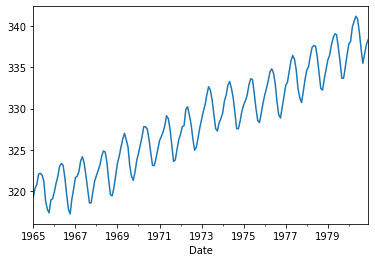

In [6]:
df['CO2 ppm'].plot()

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years.

In [7]:
monthly_sales_data = pd.pivot_table(df, values = "CO2 ppm", columns = "Year", index = "Month")
monthly_sales_data

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980
Month,,,,,,,,,,,,,,,,
1,319.32,319.94,321.65,321.88,323.40,324.60,326.12,326.93,328.73,329.45,330.45,331.63,332.81,334.66,335.89,337.81
2,320.36,320.98,321.81,322.47,324.21,325.57,326.61,327.83,329.69,330.89,330.97,332.46,333.23,335.07,336.44,338.16
3,320.82,321.81,322.36,323.17,325.33,326.55,327.16,327.95,330.47,331.63,331.64,333.36,334.55,336.33,337.63,339.88
4,322.06,323.03,323.67,324.23,326.31,327.80,327.92,329.91,331.69,332.85,332.87,334.45,335.82,337.39,338.54,340.57
5,322.17,323.36,324.17,324.88,327.01,327.80,329.14,330.22,332.65,333.28,333.61,334.82,336.44,337.65,339.06,341.19
6,321.95,323.11,323.39,324.75,326.24,327.54,328.80,329.25,332.24,332.47,333.55,334.32,335.99,337.57,338.95,340.87
7,321.20,321.65,321.93,323.47,325.37,326.28,327.52,328.11,331.03,331.34,331.90,333.05,334.65,336.25,337.41,339.25
8,318.81,319.64,320.29,321.34,323.12,324.63,325.62,326.39,329.36,329.53,330.05,330.87,332.41,334.39,335.71,337.19
9,317.82,317.86,318.58,319.56,321.85,323.12,323.61,324.97,327.60,327.57,328.58,329.24,331.32,332.44,333.68,335.49


<AxesSubplot:>

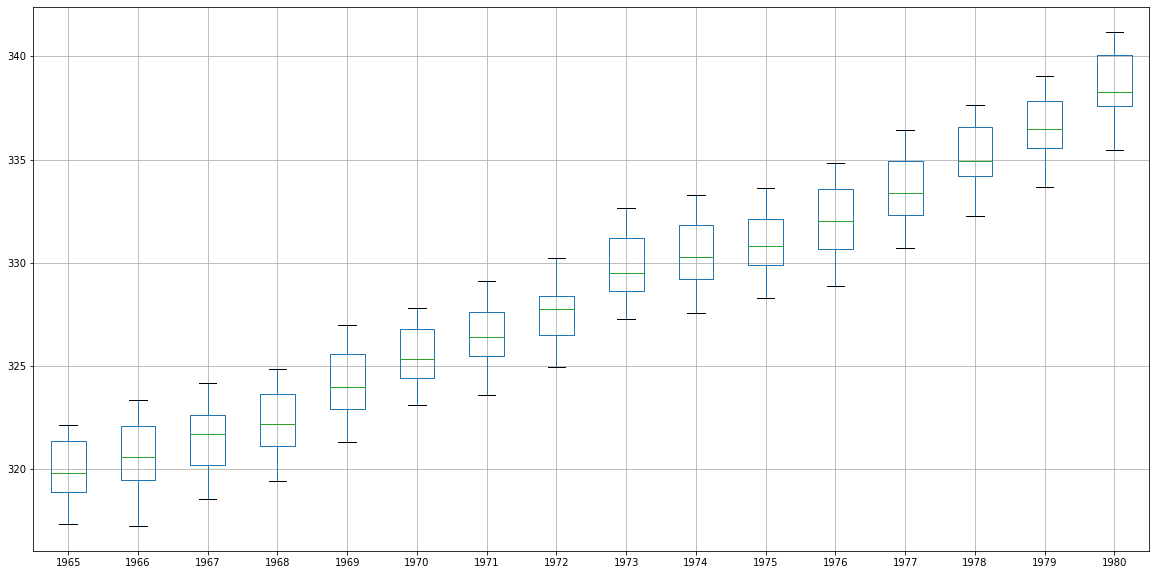

In [8]:

monthly_sales_data.boxplot(figsize=(20,10))

In [9]:
import numpy as np

# Plot a boxplot to understand the variation of Carbon Dioxide in parts per million across years.

<AxesSubplot:>

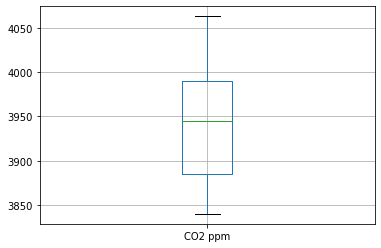

In [10]:
yearly_sales_data = pd.pivot_table(df, values = "CO2 ppm", index = "Year",aggfunc=np.sum)
yearly_sales_data.boxplot()

# Plot a graph of monthly Carbon Dioxide in parts per million across years.

<AxesSubplot:>

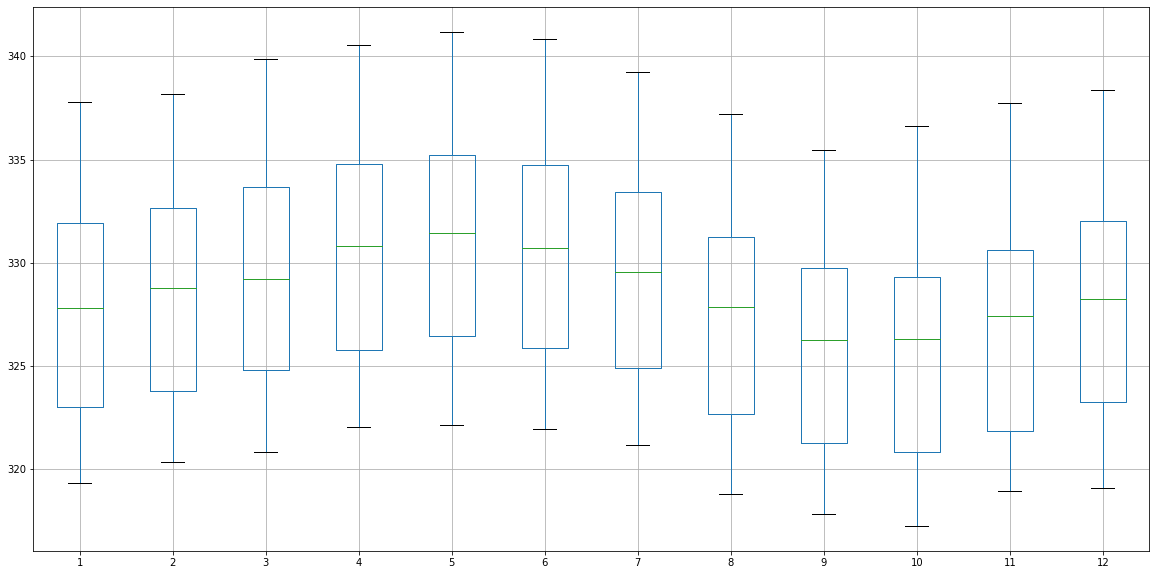

In [11]:
yearly_sales_data1 = pd.pivot_table(df, values = "CO2 ppm", index = "Year",columns='Month', aggfunc=np.sum)
yearly_sales_data1.boxplot(figsize=(20,10))

# Decompose the Time Series to understand the various components.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

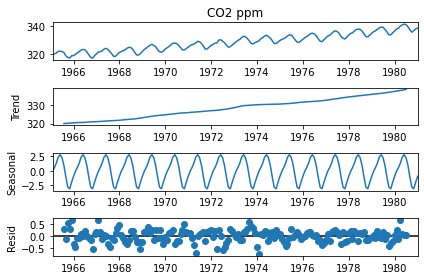

In [13]:
decomp = seasonal_decompose(df['CO2 ppm'],model='Additive')
decomp.plot()
plt.show()

In [14]:
decomp.seasonal


Date
1965-01-31   -0.066935
1965-02-28    0.527870
1965-03-31    1.323065
1965-04-30    2.369148
1965-05-31    2.812065
                ...   
1980-08-31   -1.133852
1980-09-30   -2.860241
1980-10-31   -3.156602
1980-11-30   -2.025519
1980-12-31   -0.979574
Name: seasonal, Length: 192, dtype: float64

# Plot a graph of the average and percentage change of Carbon Dioxide in parts per million across years.

<AxesSubplot:>

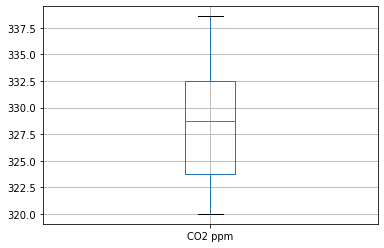

In [15]:
yearly_sales_data2 = pd.pivot_table(df, values = "CO2 ppm", index = "Year",aggfunc=np.mean)
yearly_sales_data2.boxplot()


<AxesSubplot:>

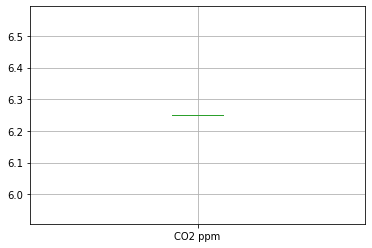

In [16]:
yearly_sales_data3 = pd.pivot_table(df, values = "CO2 ppm", index = "Year",aggfunc=lambda x: 100*x.count()/df.shape[0])
yearly_sales_data3.boxplot()

# Split the data into train and test. The first 75% of the data should be in training and last 25% of the data should be in test

In [17]:
train = df[df.index.year<1977]
test = df[df.index.year>1977]

In [18]:
train.shape

(144, 3)

# Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05. 
# If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at $\alpha$ = 0.05.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
dftest = adfuller(train['CO2 ppm'])
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -0.258
DF test p-value is 0.9313


In [21]:
#not stationary

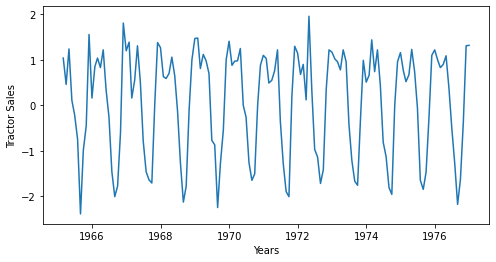

In [22]:
plt.figure(figsize=(8, 4))
plt.plot(train['CO2 ppm'].diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales');

In [23]:
train_stationary = train['CO2 ppm'].diff(periods=1)
train_stationary.dropna(inplace=True)

In [24]:
dftest = adfuller(train_stationary)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -3.387
DF test p-value is 0.0114


##### Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

# Check the ACF and PACF of the training data.

In [25]:
import statsmodels.tsa.api as smt

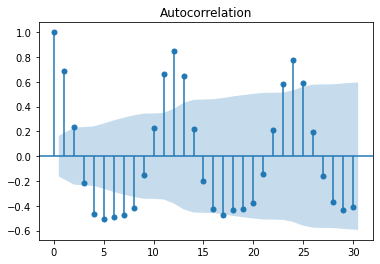

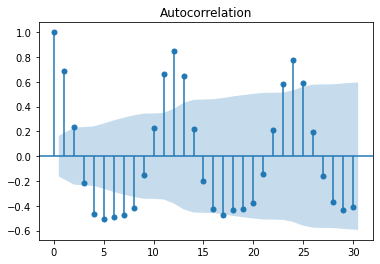

In [26]:
smt.graphics.plot_acf(train_stationary,lags=30)

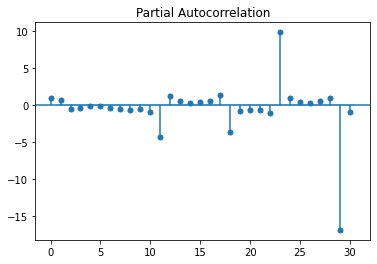

In [27]:
smt.graphics.plot_pacf(train_stationary,lags=30)
plt.show()

# Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p and q to be between 0 and 2]

In [28]:
import itertools

In [29]:
p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
train_stationary

Date
1965-02-28    1.04
1965-03-31    0.46
1965-04-30    1.24
1965-05-31    0.11
1965-06-30   -0.22
              ... 
1976-08-31   -2.18
1976-09-30   -1.63
1976-10-31   -0.37
1976-11-30    1.31
1976-12-31    1.32
Name: CO2 ppm, Length: 143, dtype: float64

In [32]:
score = {}
for param in pdq:
     ARIMA_model = ARIMA(train['CO2 ppm'],order=param).fit()
     print('ARIMA{}-AIC:{}'.format(param,ARIMA_model.aic))
     score[param] = ARIMA_model.aic
pd.DataFrame(score.items()).sort_values(by=1)

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0)-AIC:842.7376148027187
ARIMA(0, 0, 1)-AIC:665.4050879015301
ARIMA(0, 1, 0)-AIC:445.9084778426046
ARIMA(0, 1, 1)-AIC:365.3157737271446
ARIMA(1, 0, 0)-AIC:452.9872558923521
ARIMA(1, 0, 1)-AIC:371.2546290530342


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

ARIMA(1, 1, 0)-AIC:354.48183281589786
ARIMA(1, 1, 1)-AIC:339.785898418952


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


,0,1
7,"(1, 1, 1)",339.785898
6,"(1, 1, 0)",354.481833
3,"(0, 1, 1)",365.315774
5,"(1, 0, 1)",371.254629
2,"(0, 1, 0)",445.908478
4,"(1, 0, 0)",452.987256
1,"(0, 0, 1)",665.405088
0,"(0, 0, 0)",842.737615


In [33]:
mod = ARIMA(train['CO2 ppm'],order=(1,1,1))
results_ARIMA = mod.fit()
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CO2 ppm   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.893
Method:                       css-mle   S.D. of innovations              0.770
Date:                Fri, 11 Nov 2022   AIC                            339.786
Time:                        16:25:33   BIC                            351.637
Sample:                    02-28-1965   HQIC                           344.602
                         - 12-31-1976                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1096      0.193      0.569      0.570      -0.268       0.487
ar.L1.D.CO2 ppm     0.5556      0.083      6.665      0.000       0.392       0.719
ma.L1.D.CO2 ppm     0.3440      

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [34]:
pred = results_ARIMA.forecast(steps=36)

In [35]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['CO2 ppm'],pred[0],squared=False)
rmse

2.648881351703475

In [36]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test['CO2 ppm'],pred[0])
mape

0.006691360254837676

In [37]:
resultsDf = pd.DataFrame({'Mape':[mape],'RMSE': [rmse]}
                           ,index=['ARIMA(1,1,1)'])

resultsDf

,Mape,RMSE
"ARIMA(1,1,1)",0.006691,2.648881


# Check for stationarity on the whole data and stationarize the data if needed. Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.
### Note: Stationarity is to be checked with the Augmented Dickey-Fuller (ADF) test at $\alpha$ = 0.05.

In [38]:
dftest1=adfuller(df['CO2 ppm'])
print('DF test statistic is %3.3f' %dftest1[0])
print('DF test p-value is %1.4f' %dftest1[1])

#its not stationary
df_stationary = df['CO2 ppm'].diff(periods=1)
df_stationary.dropna(inplace=True)


DF test statistic is 1.270
DF test p-value is 0.9964


In [39]:
mod1 = ARIMA(df['CO2 ppm'],order=(1,1,1))
results_ARIMA1 = mod.fit()
print(results_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:              D.CO2 ppm   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -165.893
Method:                       css-mle   S.D. of innovations              0.770
Date:                Fri, 11 Nov 2022   AIC                            339.786
Time:                        16:26:40   BIC                            351.637
Sample:                    02-28-1965   HQIC                           344.602
                         - 12-31-1976                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1096      0.193      0.569      0.570      -0.268       0.487
ar.L1.D.CO2 ppm     0.5556      0.083      6.665      0.000       0.392       0.719
ma.L1.D.CO2 ppm     0.3440      

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


# Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [40]:
# Get forecast 24 steps (2 years) ahead in future
n_steps = 24
pred_uc_99,std_err ,conf_int_99= results_ARIMA.forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95,std_err,conf_int_95= results_ARIMA.forecast(steps=24, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
n_steps = 24

idx = pd.date_range(df.index[-1], periods=n_steps, freq='M')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([pred_uc_95, conf_int_95]), index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame((conf_int_99), index=idx, columns=['lower_ci_99', 'upper_ci_99'])
#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']]# just reordering 
#columns

fc_all.head()


,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1980-12-31,332.315864,330.807352,333.824376,330.333344,334.298385
1981-01-31,332.817864,329.579420,336.056309,328.561827,337.073902
1981-02-28,333.145480,328.288569,338.002390,326.762417,339.528542
1981-03-31,333.376205,327.059557,339.692854,325.074722,341.677689
1981-04-30,333.553099,325.927822,341.178375,323.531787,343.574411


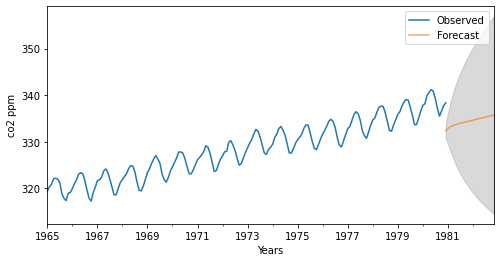

In [41]:
axis = df['CO2 ppm'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('co2 ppm')
plt.legend(loc='best')
plt.show()

\# Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC). 
[Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [42]:
pq = list(itertools.product(p,d,q))
model_pq = [(x[0], x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pq[1], model_pq[1]))
print('Model: {}{}'.format(pq[1], model_pq[2]))
print('Model: {}{}'.format(pq[2], model_pq[3]))
print('Model: {}{}'.format(pq[2], model_pq[4]))
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 1, 0, 12)
Model: (0, 1, 0)(0, 1, 1, 12)
Model: (0, 1, 0)(1, 0, 0, 12)
Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [43]:
import statsmodels.api as sm

for param in pq:
    for param_seasonal in model_pq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2062.8964944744594
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1750.6722550420477
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:437.5842180045346


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:365.2996677291688
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:262.44343651348487
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:249.68232440311942
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:333.1341370888425


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:277.136692967008


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1859.5318584693491
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1564.040194209418
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:318.36870781754106
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:284.4939771500365


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:195.35038541060564


D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:316.1483823864122
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:272.4099002383706
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:214.0957920458506
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:441.780622052286
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:322.9968747866858
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:153.20624323260782


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:65.42885338478665


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:151.72863155719017
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:90.95070210098882


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:92.83358562211828
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:60.08360741392274


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:358.659735420074
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:284.8604635309116
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:150.89294302803074


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:59.90722191067315
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:151.73436845324545


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:84.83368675612208
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:91.90566698944217


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:56.67952519074547
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:445.94820111380113
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:407.98008609637054


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:151.680605179595
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:73.15681147381328


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:142.04634778110483


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:82.37791971515848


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:93.39549836719976


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:66.8978668338581
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:362.31603864073884


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:323.4133703137503
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:151.2843303452215


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:62.0646745559513


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:156.76507273897457
SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:88.48392041144156
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:92.87478789838588


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:59.390196552914645
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:349.84096838588414
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:274.73394067135723
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:152.23169800806443


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:60.26656608376507
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:151.8039696889626


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:85.92341350011796
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:85.88798222257525


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:57.93471289960302
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:333.400650147535
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:269.63073518543683


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:145.32356292025872


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:61.88402269656315


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:146.13160768828527


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:85.29404752000167


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:86.6442349776372


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:57.298990661140046


In [44]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
31,"(0, 1, 1)","(1, 1, 1, 12)",56.679525
63,"(1, 1, 1)","(1, 1, 1, 12)",57.298991
55,"(1, 1, 0)","(1, 1, 1, 12)",57.934713
47,"(1, 0, 1)","(1, 1, 1, 12)",59.390197
27,"(0, 1, 1)","(0, 1, 1, 12)",59.907222


In [45]:
import statsmodels.api as sm

## SARIMA(2, 0, 0)(2, 0, 2, 12)
mod = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                order=(2,0,0),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -172.869
Date:                Fri, 11 Nov 2022   AIC                            351.738
Time:                        16:27:11   BIC                            360.605
Sample:                    01-31-1965   HQIC                           355.341
                         - 12-31-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6956      0.073     23.369      0.000       1.553       1.838
ar.L2         -0.6956      0.072     -9.595      0.000      -0.838      -0.554
sigma2         0.6682      0.093      7.175      0.0

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [46]:
pred = results_SARIMA.get_forecast(steps=36)
pred.predicted_mean
rmse = np.sqrt(mean_squared_error(test['CO2 ppm'] ,pred.predicted_mean))
print(rmse)
mape = mean_absolute_percentage_error(test['CO2 ppm'] ,pred.predicted_mean)

2.3984228093830504


In [47]:
temp_resultsDf = pd.DataFrame({'Mape':[mape],'RMSE': [rmse]}
                           ,index=['SARIMA(0,0,1)(2,0,2)12_without seasonality_diff'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Mape,RMSE
"ARIMA(1,1,1)",0.006691,2.648881
"SARIMA(0,0,1)(2,0,2)12_without seasonality_diff",0.006103,2.398423


# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [48]:
mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(2,0,0),
                               
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  192
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -234.818
Date:                Fri, 11 Nov 2022   AIC                            475.637
Time:                        16:27:49   BIC                            485.378
Sample:                    01-31-1965   HQIC                           479.583
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6914      0.064     26.620      0.000       1.567       1.816
ar.L2         -0.6913      0.063    -10.892      0.000      -0.816      -0.567
sigma2         0.6934      0.084      8.301      0.0

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [49]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 24
pred_uc_99 = results_SARIMA.get_forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results_SARIMA.get_forecast(steps=24, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean,  pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([ pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']]# just reordering 
#columns

fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1981-01-01,338.813865,337.181756,340.445975,337.181756,340.445975
1981-02-01,339.152910,335.945963,342.359857,335.945963,342.359857
1981-03-01,339.412601,334.635302,344.189899,334.635302,344.189899
1981-04-01,339.617450,333.334587,345.900313,333.334587,345.900313
1981-05-01,339.784401,332.082878,347.485924,332.082878,347.485924


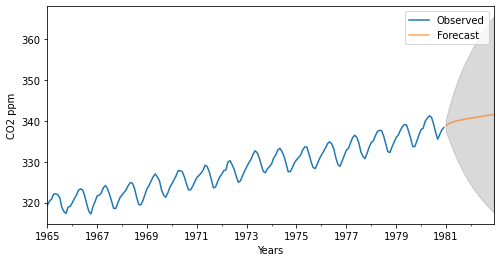

In [50]:
axis = df['CO2 ppm'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model. Consider a degree of differencing on the Seasonal scale as well.

In [51]:
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
print(SARIMA_AIC)

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 1)(0, 1, 0, 12)
Model: (0, 1, 0)(0, 1, 1, 12)
Model: (0, 1, 0)(1, 0, 0, 12)
Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []


In [52]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2757.623493854996
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2382.549952046173
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:629.4872954777325


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:528.5145356272412
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:348.2291417665366
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:339.224632936892


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:450.69157255941025
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.6034466651661


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2488.00653850036
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2129.6896221574298
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:455.8599037934947
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:406.0726202130736


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:251.81055725073804


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:383.5572229167212
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:366.54848379745704
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:269.97361060780855
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:596.6907012537115


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:435.4344955898867
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:189.35384235416882


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:106.94291402366787
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:187.3994984510975
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:132.3294750907817


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:124.38091770951632
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:106.0433751321631


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:487.6909060582385
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:384.26603982610266
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:184.43417789305437


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:93.80046764824803
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:185.1174245955596


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:117.47266328633137
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:119.58558053648312


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:94.67260115510092
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:600.258801957887
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:575.7036360404603


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:188.24307692713248
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:114.68408203340834


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:173.9623046738782


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:119.90776698692125
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:125.47986935623112


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:110.24879109472283
SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:490.9930761276106


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:462.99566196114847
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:185.75933324947806


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:95.25405066612868


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred fre

SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:192.7881178645839


D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:123.83795151301311
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:121.33723206010902


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:97.85187789605237
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:473.7999332231671
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:371.3896998667558


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:186.6045964153186
SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:95.9680201723968


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:185.9455579785597
SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:120.45343992756156


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:114.1157051539271
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:98.05970845441959
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:452.92632757100375
SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:365.4375650307263


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:177.76872428886563


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:95.41035419673841


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:179.20327150492244
SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:117.93180289001867
SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:113.42610928850405


D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequenc

SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:95.03718694025346


In [53]:
mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(2,0,0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2], 12)   Log Likelihood                 -41.030
Date:                                 Fri, 11 Nov 2022   AIC                             96.059
Time:                                         16:28:19   BIC                            117.843
Sample:                                     01-31-1965   HQIC                           104.901
                                          - 12-31-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6470      0.079      8.178      0.000       0.492       0

D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [54]:
pred = results_SARIMA.get_forecast(steps=36)
pred.predicted_mean
rmse = np.sqrt(mean_squared_error(test['CO2 ppm'] ,pred.predicted_mean))
print(rmse)
mape = mean_absolute_percentage_error(test['CO2 ppm'] ,pred.predicted_mean)

4.244974456384186


In [55]:
temp_resultsDf = pd.DataFrame({'Mape':[mape],'RMSE': [rmse]}
                           ,index=['SARIMA(0,0,1)(2,0,2)12_with seasonality diff'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Mape,RMSE
"ARIMA(1,1,1)",0.006691,2.648881
"SARIMA(0,0,1)(2,0,2)12_without seasonality_diff",0.006103,2.398423
"SARIMA(0,0,1)(2,0,2)12_with seasonality diff",0.012504,4.244974


# Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [56]:
mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(2,0,0),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\softwarefordse\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(2, 0, 0)x(2, 0, [1, 2], 12)   Log Likelihood                 -41.030
Date:                                 Fri, 11 Nov 2022   AIC                             96.059
Time:                                         16:28:21   BIC                            117.843
Sample:                                     01-31-1965   HQIC                           104.901
                                          - 12-31-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6470      0.079      8.178      0.000       0.492       0

D:\softwarefordse\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [57]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 24
pred_uc_99 = results_SARIMA.get_forecast(steps=24, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = results_SARIMA.get_forecast(steps=24, alpha=0.05) # alpha=0.05 signifies 95% confidence interval

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

idx = pd.date_range(df.index[-1], periods=n_steps, freq='MS')#defining the date range for 3 years
#into the future

fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean,  pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 95% confidence interval

fc_99 = pd.DataFrame(np.column_stack([ pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])#creating a data frame
#by raising the results to the appropriate power for suitable predicted values - For 99% confidence interval

fc_all = fc_95.combine_first(fc_99)

fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']]# just reordering 
#columns

fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1981-01-01,339.522790,338.929945,340.115635,338.929945,340.115635
1981-02-01,340.061972,339.355871,340.768073,339.355871,340.768073
1981-03-01,341.059853,340.249999,341.869706,340.249999,341.869706
1981-04-01,342.125279,341.241849,343.008709,341.241849,343.008709
1981-05-01,342.623828,341.681491,343.566165,341.681491,343.566165


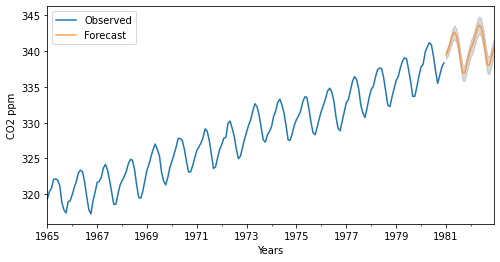

In [58]:
axis = df['CO2 ppm'].plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

# END